In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math

In [2]:
data = pd.read_csv("batdongsan.com.vn.csv", dtype = {"month": "string", "id": "string"})

In [3]:
data.columns

Index(['id', 'month', 'project', 'investor', 'square', 'bedrooms', 'bathrooms',
       'direction', 'balcony', 'district', 'ward', 'price'],
      dtype='object')

In [4]:
data.head()

,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price
0,28086120,12,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0
1,28088954,12,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0
2,28097966,12,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0
3,27895887,12,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0
4,28056031,12,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0


In [6]:
data.describe()

,square,bedrooms,bathrooms,price
count,81162.000000,81162.000000,81162.000000,81162.000000
mean,83.481974,2.365602,1.897785,2404.748090
std,25.662160,0.622283,0.404293,1038.825418
min,7.000000,1.000000,1.000000,350.000000
25%,66.000000,2.000000,2.000000,1520.000000
50%,79.000000,2.000000,2.000000,2300.000000
75%,98.000000,3.000000,2.000000,3150.000000
max,296.000000,4.000000,4.000000,5000.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81163 entries, 0 to 81162
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         81163 non-null  string 
 1   month      81162 non-null  string 
 2   project    78097 non-null  object 
 3   investor   65453 non-null  object 
 4   square     81162 non-null  float64
 5   bedrooms   81162 non-null  float64
 6   bathrooms  81162 non-null  float64
 7   direction  51086 non-null  object 
 8   balcony    54426 non-null  object 
 9   district   81162 non-null  object 
 10  ward       79506 non-null  object 
 11  price      81162 non-null  float64
dtypes: float64(4), object(6), string(2)
memory usage: 7.4+ MB


C:\Users\lequa\miniconda3\envs\FMLAb\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: ylabel='price'>

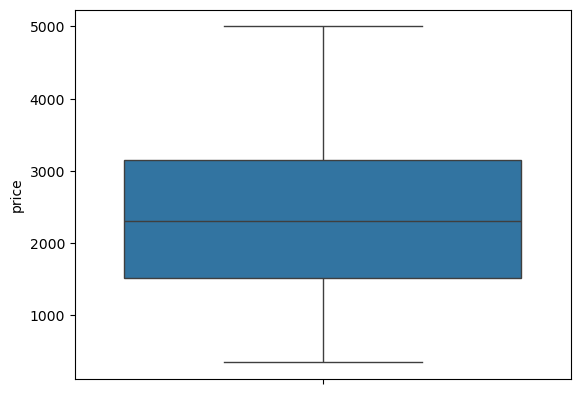

In [16]:
sns.boxplot(data['price'])

C:\Users\lequa\miniconda3\envs\FMLAb\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: ylabel='square'>

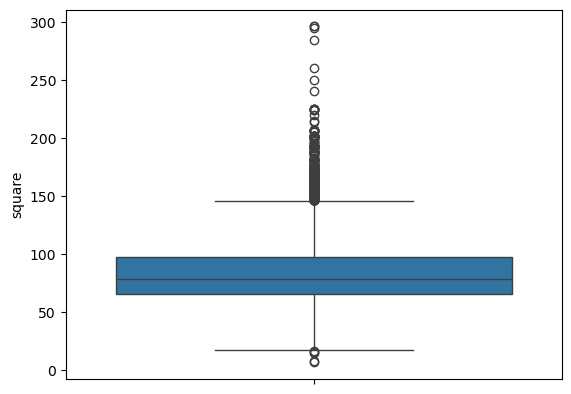

In [17]:
sns.boxplot(data['square'])

C:\Users\lequa\miniconda3\envs\FMLAb\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: ylabel='bedrooms'>

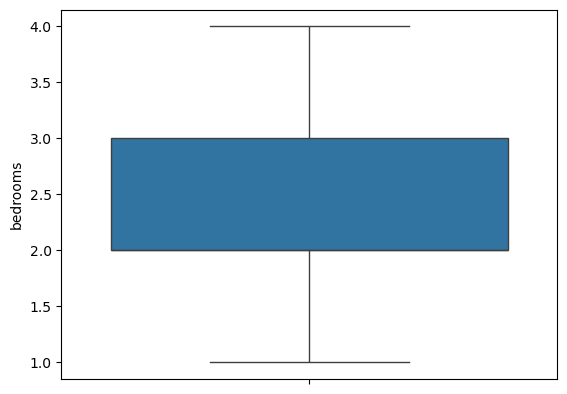

In [19]:
sns.boxplot(data['bedrooms'])

C:\Users\lequa\miniconda3\envs\FMLAb\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: ylabel='bathrooms'>

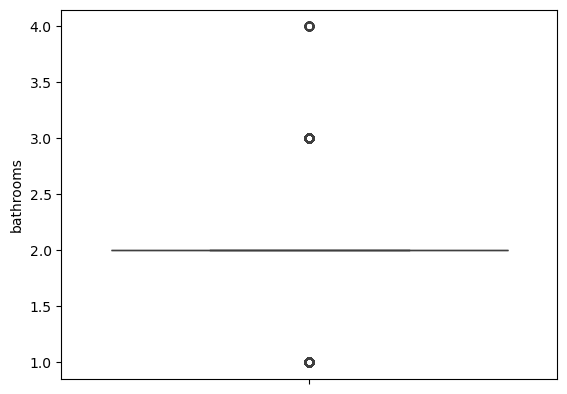

In [20]:
sns.boxplot(data['bathrooms'])

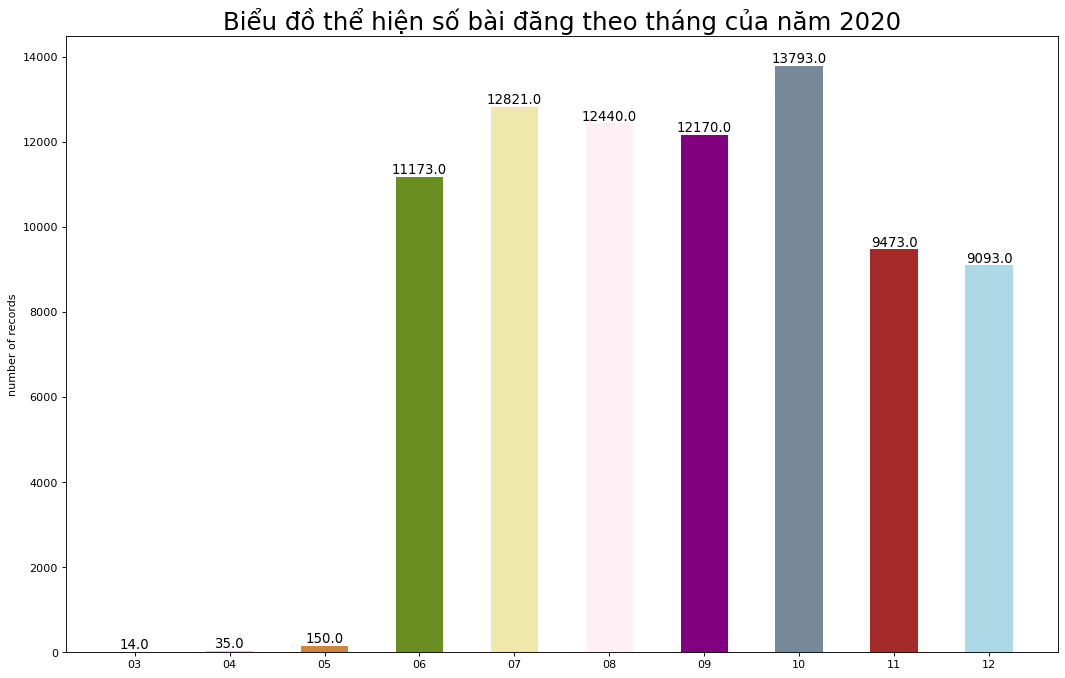

In [39]:
df1 = data.groupby('month').size().reset_index(name = 'number of records')
n = df1['month'].unique().__len__() + 1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k = n)
plt.figure(figsize = (16, 10), dpi = 80)
plt.bar(df1['month'], df1['number of records'], color = c, width = .5)
for i, val in enumerate(df1['number of records'].values):
    plt.text(i, val, float(val), horizontalalignment = 'center', verticalalignment = 'bottom', fontdict = {'fontweight': 500, 'size': 12})
plt.title("Biểu đồ thể hiện số bài đăng theo tháng của năm 2020", fontsize=22)
plt.ylabel('number of records')
plt.show()

In [61]:
def cal(sth):
    return sth['price'] / sth['square']

tmp = data.copy()
tmp['pricepersquare'] = tmp.apply(cal, axis = 1)
month_mean = tmp.groupby('month')['pricepersquare'].mean().reset_index()
month_mean['pricepersquare'] = month_mean['pricepersquare'].round(1)
print(month_mean)

  month  pricepersquare
0    03            26.0
1    04            23.8
2    05            26.8
3    06            28.1
4    07            28.2
5    08            28.0
6    09            28.5
7    10            28.8
8    11            29.3
9    12            29.4


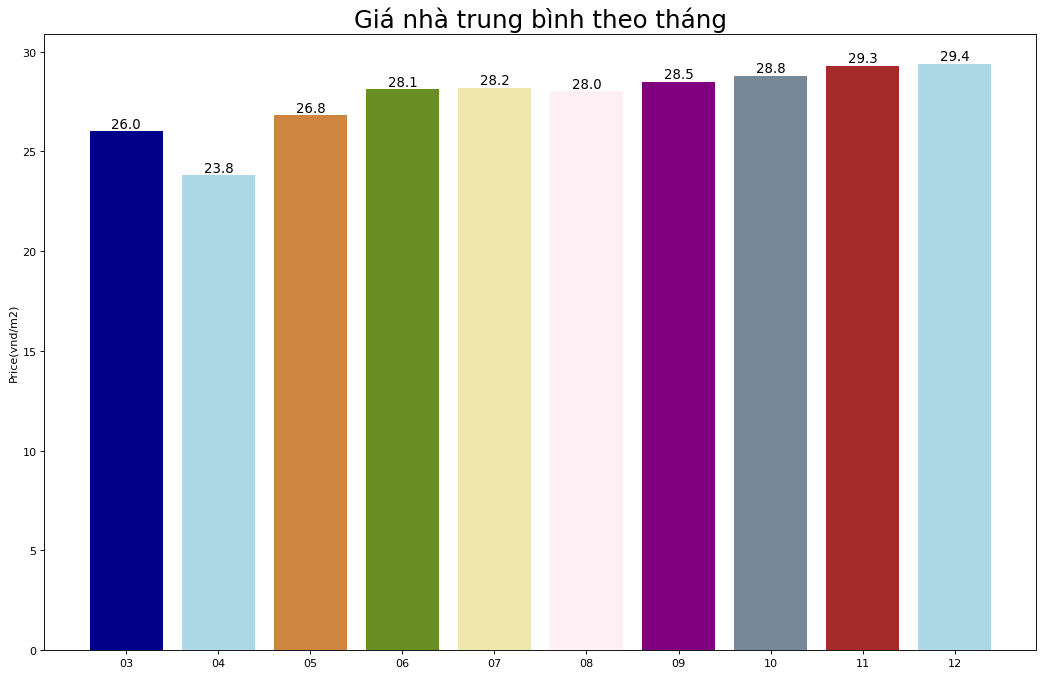

In [64]:
plt.figure(figsize = (16, 10), dpi = 80)
n = month_mean['month'].unique().__len__() + 1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k = n)
plt.bar(month_mean['month'], month_mean['pricepersquare'], color = c)
for i, val in enumerate(month_mean['pricepersquare'].values):
    plt.text(i, val, float(val), horizontalalignment = 'center', verticalalignment = 'bottom', fontdict = {'fontweight': 500, 'size': 12})
plt.title("Giá nhà trung bình theo tháng", fontsize = 22)
plt.ylabel('Price(vnd/m2)')
plt.show()